## Aquiring the dataset

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


Link to the data : https://www.kaggle.com/datasets/rajyellow46/wine-quality 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

import os

In [3]:
os.getcwd()
os.chdir("C:/Users/wisdo/OneDrive/Desktop/MCDaniel/CourseWork/ANA 522/Week6/Assignment/")
os.getcwd()

'C:\\Users\\wisdo\\OneDrive\\Desktop\\MCDaniel\\CourseWork\\ANA 522\\Week6\\Assignment'

In [4]:
### Loading the Wine Dataset
wine = pd.read_csv('winequalityN.csv', sep=',')
display(wine)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### (25%) Expand the Abstract from the last homework, and add at least two additional problem statements that the dataset could be analyzed to answer them preliminarily, if not fully.

- The first problem statement will be to categorize the dataset using the type of wine (red and white wine)

In [5]:
wine_cpy = wine.copy()
Wine_Category = wine_cpy.set_index(['type'])
Wine_Category_Sorted = Wine_Category.sort_index()
display(Wine_Category_Sorted)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6
red,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5
red,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
red,7.0,0.380,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6
red,8.2,0.420,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.0,0.330,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,6
white,6.3,0.240,0.37,1.8,0.031,6.0,61.0,0.98970,3.30,0.34,12.2,4
white,7.4,0.180,0.27,1.3,0.048,26.0,105.0,0.99400,3.52,0.66,10.6,6


In [8]:
#Pair scatter plot for fixed acidity, volatile acidity, citric acid and chlorides
Wine_Category_Sorted_trim = Wine_Category_Sorted[['fixed acidity','volatile acidity','citric acid','chlorides']]
Wine_Category_Sorted_trim
#Reset index
Wine_Category_Sorted_trim_idx = Wine_Category_Sorted_trim.reset_index()
Wine_Category_Sorted_trim_idx['index']=Wine_Category_Sorted_trim_idx.index.to_series().shift(-1)

Wine_Category_Sorted_trim_idx

,type,fixed acidity,volatile acidity,citric acid,chlorides,index
0,red,6.0,0.310,0.47,0.067,1.0
1,red,10.4,0.640,0.24,0.105,2.0
2,red,7.3,0.365,0.49,0.088,3.0
3,red,7.0,0.380,0.49,0.097,4.0
4,red,8.2,0.420,0.49,0.084,5.0
...,...,...,...,...,...,...
6492,white,6.0,0.330,0.38,0.040,6493.0
6493,white,6.3,0.240,0.37,0.031,6494.0
6494,white,7.4,0.180,0.27,0.048,6495.0
6495,white,7.4,0.190,0.30,0.053,6496.0


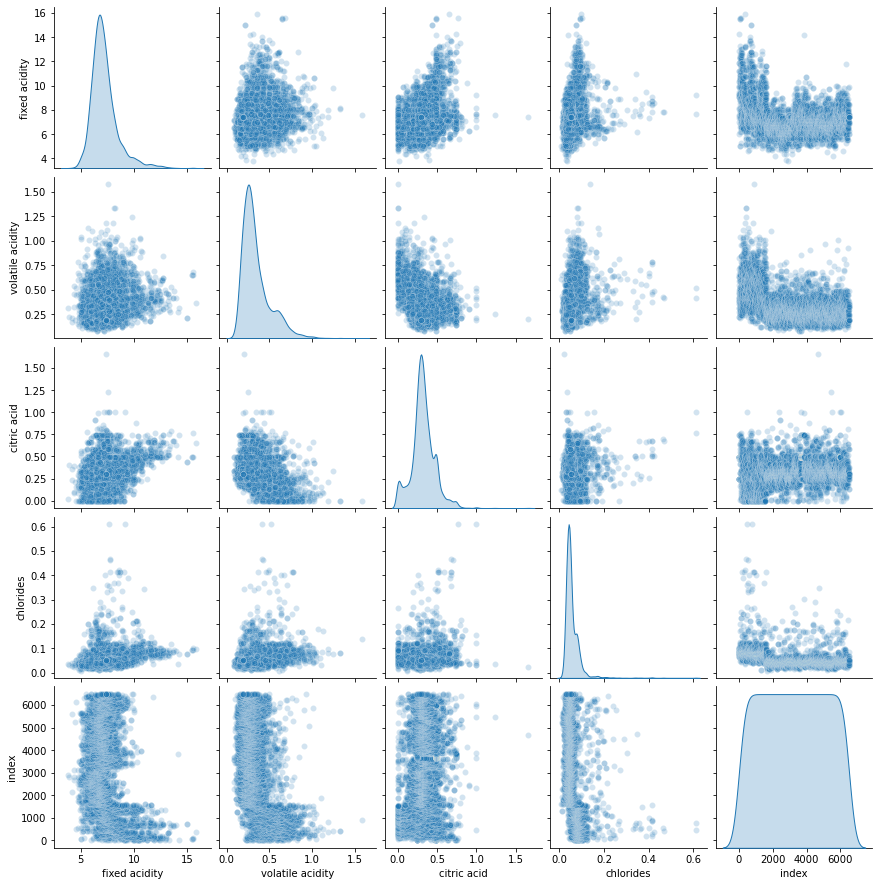

In [9]:
#Pair scatter plot for fixed acidity, volatile acidity, citric acid and chlorides
sns.pairplot(Wine_Category_Sorted_trim_idx, diag_kind='kde', plot_kws={'alpha': 0.2})

- The second problem statement will be to categorize the dataset using the quality of wine (range : 0 - 10)

In [29]:
wine_cpy = wine.copy()
Wine_Category_Qlty = wine_cpy.set_index(['quality'])
Wine_Category_Qlty_Sorted = Wine_Category_Qlty.sort_index()
display(Wine_Category_Qlty_Sorted)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,
3,white,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.60
3,white,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.40
3,white,7.1,0.49,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.00
3,white,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.70
3,red,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...
9,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.40
9,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.90
9,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.40


###  (25%) Create different multiple index levels on rows and/or columns of the dataset so they can be used to suggest answers to the problem statements proposed above. Please create at least two different ones to gain insight from various perspectives and make summaries.

- Transform the wine dataset with hierarchical indexing by the multiple index in the order of type, and quality attributes

In [27]:
wine_cpy = wine.copy()
Wine_Category_Type_Qlty = wine_cpy.set_index(['type','quality'])
Wine_Category_Type_Qlty_Sorted = Wine_Category_Type_Qlty.sort_index()
display(Wine_Category_Type_Qlty_Sorted)

fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   3                 11.6             0.580         0.66            2.20   
      3                 10.4             0.610         0.49            2.10   
      3                  7.4             1.185         0.00            4.25   
      3                 10.4             0.440         0.42            1.50   
      3                  8.3             1.020         0.02            3.40   
...                      ...               ...          ...             ...   
white 9                  9.1             0.270         0.45           10.60   
      9                  6.6             0.360         0.29            1.60   
      9                  7.4             0.240         0.36            2.00   
      9                  6.9             0.360         0.34            4.20   
      9                  7.1             0.260         0.49            2.20   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
type  quality                                                                  
red   3            0.074                 10.0                  47.0  1.00080   
      3            0.200                  5.0                  16.0  0.99940   
      3            0.097                  5.0                  14.0  0.99660   
      3            0.145                 34.0                  48.0  0.99832   
      3            0.084                  6.0                  11.0  0.99892   
...                  ...                  ...                   ...      ...   
white 9            0.035                 28.0                 124.0  0.99700   
      9            0.021                 24.0                  85.0  0.98965   
      9            0.031                 27.0                 139.0  0.99055   
      9            0.018                 57.0                 119.0  0.98980   
      9            0.032                 31.0                 113.0  0.99030   

                 pH  sulphates  alcohol  
type  quality                            
red   3        3.25       0.57      9.0  
      3        3.16       0.63      8.4  
      3        3.63       0.54     10.7  
      3        3.38       0.86      9.9  
      3        3.48       0.49     11.0  
...             ...        ...      ...  
white 9        3.20       0.46     10.4  
      9        3.41       0.61     12.4  
      9        3.28       0.48     12.5  
      9        3.28       0.36     12.7  
      9        3.37       0.42     12.9  

[6497 rows x 11 columns]

- Transform the wine dataset with hierarchical indexing by the multiple index in the order of type and quality columns with
only 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', and 'density' attributes included. Sort by row 
indices and name the new dataset as Wine_Category_QT_Sorted

In [10]:
wine_cpy_1 = wine.copy()
wine_cpy_1 = wine_cpy_1[['type','quality','fixed acidity','volatile acidity','citric acid','residual sugar','density']]
Wine_Category_QT = wine_cpy_1.set_index(['type','quality'])
Wine_Category_QT_Sorted = Wine_Category_QT.sort_index()
display(Wine_Category_QT_Sorted)

fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   3                 11.6             0.580         0.66            2.20   
      3                 10.4             0.610         0.49            2.10   
      3                  7.4             1.185         0.00            4.25   
      3                 10.4             0.440         0.42            1.50   
      3                  8.3             1.020         0.02            3.40   
...                      ...               ...          ...             ...   
white 9                  9.1             0.270         0.45           10.60   
      9                  6.6             0.360         0.29            1.60   
      9                  7.4             0.240         0.36            2.00   
      9                  6.9             0.360         0.34            4.20   
      9                  7.1             0.260         0.49            2.20   

               density  
type  quality           
red   3        1.00080  
      3        0.99940  
      3        0.99660  
      3        0.99832  
      3        0.99892  
...                ...  
white 9        0.99700  
      9        0.98965  
      9        0.99055  
      9        0.98980  
      9        0.99030  

[6497 rows x 5 columns]

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

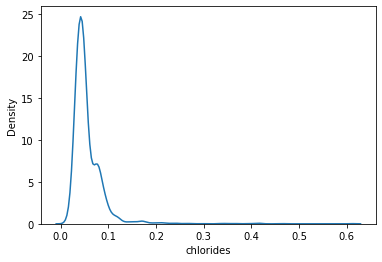

In [12]:
#Density plot on chlorides
sns.kdeplot(data=Wine_Category_Sorted_trim_idx, x=Wine_Category_Sorted_trim_idx.chlorides)

### (25%) Data Wrangling Playground.

- Apply any technique covered in the text reading of this week to seek additional support to reorganize the data in shapes 
and categorical structures, seek benefits in analyzing the data context, and draw conclusions using the auxiliary tools.

- Compute total fixed acidity of all wines by wine type using wine

In [15]:
#creating a subset
Wine_Category_Sorted_trim_idx_sb = Wine_Category_Sorted_trim_idx[::20]
Wine_Category_Sorted_trim_idx_sb

,type,fixed acidity,volatile acidity,citric acid,chlorides,index
0,red,6.0,0.310,0.47,0.067,1.0
400,red,6.6,0.735,0.02,0.122,401.0
800,red,9.4,0.500,0.34,0.082,801.0
1200,red,7.7,0.570,0.21,0.069,1201.0
1600,white,7.0,0.300,0.28,0.042,1601.0
2000,white,7.0,0.460,0.20,0.046,2001.0
2400,white,7.0,0.220,0.24,0.041,2401.0
2800,white,6.4,0.310,0.31,0.045,2801.0
3200,white,6.5,0.200,0.33,0.039,3201.0
3600,white,8.6,0.160,0.38,0.040,3601.0


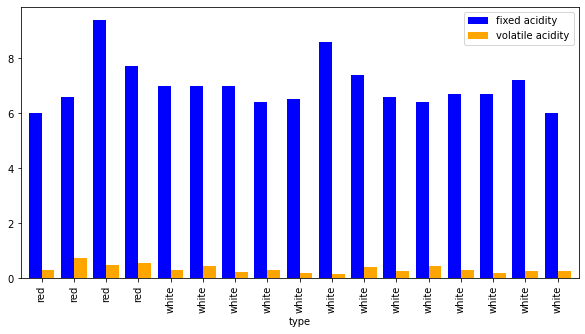

In [34]:
#Draw a Bar plot of Wine_Category_Sorted_trim_idx,of fixed acidity and	volatile acidity based on wine type
Wine_Category_Sorted_s = Wine_Category_Sorted[::20]
df = pd.DataFrame({'fixed acidity': Wine_Category_Sorted_s['fixed acidity'],
                   'volatile acidity': Wine_Category_Sorted_s['volatile acidity']},
                   index=Wine_Category_Sorted_s.index)
ax = df.plot.bar(figsize=(10,5),color={"fixed acidity": "blue", "volatile acidity": "orange"}, width=0.8)

In [23]:
reshaped = wine.groupby('type').sum('fixed acidity')
print(reshaped["fixed acidity"])

type
red      13290.40
white    33523.55
Name: fixed acidity, dtype: float64


- Compute total fixed acidity of all wines by wine quality

In [25]:
reshaped_1 = wine.groupby('quality').sum('fixed acidity')
print(reshaped_1["fixed acidity"])

quality
3      235.60
4     1574.40
5    15633.50
6    20328.20
7     7692.15
8     1313.00
9       37.10
Name: fixed acidity, dtype: float64


- Provide informative descriptions and comments on these operations performed in the context of the data topics.

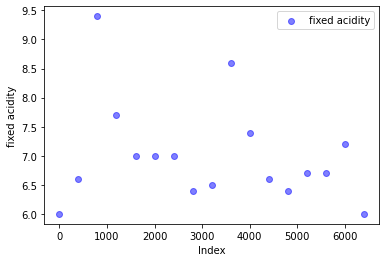

In [35]:
#implementing a scatter plot
plt.scatter(Wine_Category_Sorted_trim_idx_sb.index, Wine_Category_Sorted_trim_idx_sb['fixed acidity'], 
            c='blue', alpha=0.5, label='fixed acidity')
plt.xlabel('Index')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

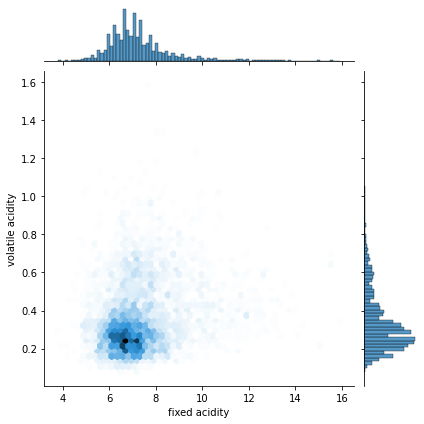

In [37]:
j = sns.jointplot(data=wine_cpy, x ='fixed acidity', y='volatile acidity', kind='hex')
#the darkest sides are the clusters where we have more data points
#<<< Chart 1

In [28]:
wine_cpy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,density
count,6487.000000,6489.000000,6494.000000,6495.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.994697
std,1.296750,0.164649,0.145265,4.758125,0.002999
min,3.800000,0.080000,0.000000,0.600000,0.987110
25%,6.400000,0.230000,0.250000,1.800000,0.992340
50%,7.000000,0.290000,0.310000,3.000000,0.994890
75%,7.700000,0.400000,0.390000,8.100000,0.996990
max,15.900000,1.580000,1.660000,65.800000,1.038980


- Transform Wine_Category_QT_Sorted so that type and quality are multiple indices while fixed acidity and volatile acidity
are columns.Display the result with density values only in a transposed version.

In [31]:
Wine_Category_QT_Sorted.pivot_table(values='density',index=['type','quality'],columns=['fixed acidity','volatile acidity']).T

type                           red                                  white      \
quality                          3   4        5   6        7   8        3   4   
fixed acidity volatile acidity                                                  
3.8           0.310            NaN NaN      NaN NaN      NaN NaN      NaN NaN   
3.9           0.225            NaN NaN      NaN NaN      NaN NaN      NaN NaN   
4.2           0.170            NaN NaN      NaN NaN      NaN NaN      NaN NaN   
              0.215            NaN NaN      NaN NaN      NaN NaN  0.99688 NaN   
4.4           0.320            NaN NaN      NaN NaN      NaN NaN      NaN NaN   
...                             ..  ..      ...  ..      ...  ..      ...  ..   
15.0          0.210            NaN NaN      NaN NaN  1.00005 NaN      NaN NaN   
15.5          0.645            NaN NaN  1.00315 NaN      NaN NaN      NaN NaN   
15.6          0.645            NaN NaN  1.00315 NaN      NaN NaN      NaN NaN   
              0.685            NaN NaN      NaN NaN  1.00320 NaN      NaN NaN   
15.9          0.360            NaN NaN  0.99760 NaN      NaN NaN      NaN NaN   

type                                                               
quality                          5        6        7        8   9  
fixed acidity volatile acidity                                     
3.8           0.310            NaN  0.99248      NaN      NaN NaN  
3.9           0.225            NaN      NaN      NaN  0.98900 NaN  
4.2           0.170            NaN      NaN  0.98999      NaN NaN  
              0.215            NaN      NaN      NaN      NaN NaN  
4.4           0.320            NaN      NaN      NaN  0.98904 NaN  
...                             ..      ...      ...      ...  ..  
15.0          0.210            NaN      NaN      NaN      NaN NaN  
15.5          0.645            NaN      NaN      NaN      NaN NaN  
15.6          0.645            NaN      NaN      NaN      NaN NaN  
              0.685            NaN      NaN      NaN      NaN NaN  
15.9          0.360            NaN      NaN      NaN      NaN NaN  

[2246 rows x 13 columns]

### (25%) Summary and Conclusion

- Summarize the findings to the problem statements and give conclusions after applying data munging steps above

In [35]:
# shape of the wine dataset
wine.shape

(6497, 13)

In [36]:
# join the wine_cpy dataset with the wine_cpy_1 dataset
pd.merge(wine_cpy, wine_cpy_1, left_index=True, right_index=True)

,fixed acidity_x,volatile acidity_x,citric acid_x,residual sugar_x,density_x,type,quality,fixed acidity_y,volatile acidity_y,citric acid_y,residual sugar_y,density_y
0,7.0,0.270,0.36,20.7,1.00100,white,6,7.0,0.270,0.36,20.7,1.00100
1,6.3,0.300,0.34,1.6,0.99400,white,6,6.3,0.300,0.34,1.6,0.99400
2,8.1,0.280,0.40,6.9,0.99510,white,6,8.1,0.280,0.40,6.9,0.99510
3,7.2,0.230,0.32,8.5,0.99560,white,6,7.2,0.230,0.32,8.5,0.99560
4,7.2,0.230,0.32,8.5,0.99560,white,6,7.2,0.230,0.32,8.5,0.99560
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.99490,red,5,6.2,0.600,0.08,2.0,0.99490
6493,5.9,0.550,0.10,2.2,0.99512,red,6,5.9,0.550,0.10,2.2,0.99512
6494,6.3,0.510,0.13,2.3,0.99574,red,6,6.3,0.510,0.13,2.3,0.99574
6495,5.9,0.645,0.12,2.0,0.99547,red,5,5.9,0.645,0.12,2.0,0.99547


- So far, we've been able to address some of the problem statements earlier highlighted